In [1]:
conda update -n base -c defaults conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py39haa95532_0         923 KB
    ------------------------------------------------------------
                                           Total:         923 KB

The following packages will be UPDATED:

  conda                               4.12.0-py39haa95532_0 --> 4.13.0-py39haa95532_0




conda-4.13.0         | 923 KB    |            |   0% 
conda-4.13.0         | 923 KB    | 1          |   2% 
conda-4.13.0         | 923 KB    | 6          |   7% 
conda-4.13.0         | 923 KB    | #2         |  12% 
conda-4.13.0         | 923 KB    | #7         |  17% 
conda-4.13.0         | 923 KB    | ##2        |  23% 
conda-4.13.0         | 923 KB    | ##7        |  28% 
c


EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [2]:
conda install -c conda-forge shap

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##




  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - shap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py39hcbf5309_1         1.0 MB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    shap-0.40.0                |   py39h2e25243_1         587 KB  conda-forge
    slicer-0.0.7               |     pyhd8ed1ab_0          16 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.6 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39
  shap               conda-forge/win-64::shap-0.40.0-py39h2e25243_1
  slicer             conda-forge/noarch::slicer-0.0.7-pyhd8ed1ab_0

The following packages will be UPDATED:

  conda              pkgs/main::conda

==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [3]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('f:\heart.csv')
#df


In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2)

In [8]:
x_train = train_set.iloc[1:,0:13].values
y_train = train_set.iloc[1:,13].values
x_test = test_set.iloc[1:,0:13].values
y_test = test_set.iloc[1:,13].values

In [9]:
import xgboost
import shap

# train an XGBoost model
#X, y = shap.datasets.boston()
X=x_train
y=y_train
#Conver array to dataframe
X = pd.DataFrame(X,columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])

model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

ModuleNotFoundError: No module named 'xgboost'

In [9]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0
1,58.0,1.0,0.0,114.0,318.0,0.0,2.0,140.0,0.0,4.4,0.0,3.0,1.0
2,48.0,1.0,1.0,110.0,229.0,0.0,1.0,168.0,0.0,1.0,0.0,0.0,3.0
3,37.0,0.0,2.0,120.0,215.0,0.0,1.0,170.0,0.0,0.0,2.0,0.0,2.0
4,48.0,1.0,1.0,110.0,229.0,0.0,1.0,168.0,0.0,1.0,0.0,0.0,3.0


In [10]:
shap.initjs()
shap.plots.force(shap_values[0])

In [11]:
shap.plots.force(shap_values)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


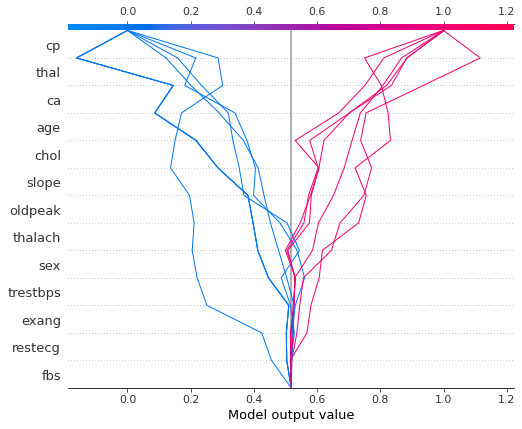

In [12]:
# Get expected value and shap values array
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:13],feature_names=list(X.columns))

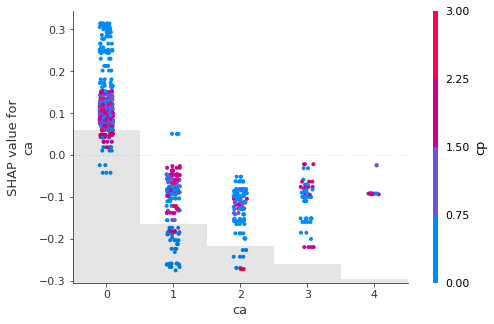

In [16]:
#SHAP scatter plots
shap.plots.scatter(shap_values[:,"ca"], color=shap_values)

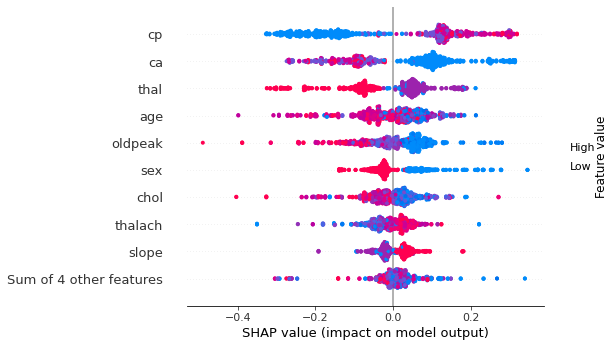

In [17]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

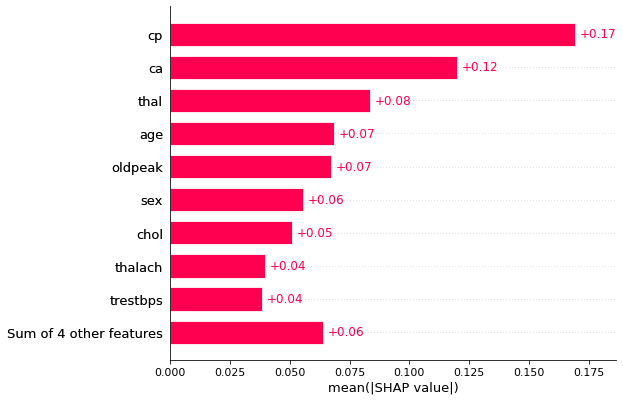

In [18]:
shap.plots.bar(shap_values)

In [19]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [20]:
import transformers
import shap

# load a transformers pipeline model
model = transformers.pipeline('sentiment-analysis', return_all_scores=True)

# explain the model on two sample inputs
explainer = shap.Explainer(model) 
shap_values = explainer(["What a great movie! ...if you have no taste."])

# visualize the first prediction's explanation for the POSITIVE output class
shap.plots.text(shap_values[0, :, "POSITIVE"])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


  0%|          | 0/240 [00:00<?, ?it/s]

Partition explainer: 2it [00:29, 29.22s/it]                                                                            


In [21]:
# ...include code from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

import shap
import numpy as np

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[1:5])

# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:5])

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


AssertionError: <class 'transformers.pipelines.text_classification.TextClassificationPipeline'> is not currently a supported model type!

In [ ]:
import sklearn
import shap
from sklearn.model_selection import train_test_split

# print the JS visualization code to the notebook
shap.initjs()

# train a SVM classifier
X_train,X_test,Y_train,Y_test = train_test_split(*shap.datasets.iris(), test_size=0.2, random_state=0)
svm = sklearn.svm.SVC(kernel='rbf', probability=True)
svm.fit(X_train, Y_train)

# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(svm.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")

In [ ]:
# plot the SHAP values for the Setosa output of all instances
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test, link="logit")